
# Project: Comparative data analysis of the molecular dynamics simulations of complexes between matriptase protein and serine protease inhibitors: HAI-1 and HAI-2

# <div align="center">Alumno: Christian Solis Calero
## <div align="center">Institución: Universidad Nacional Mayor de San Marcos

## 1er Paso: Generación de la data
La data esta conformada por las trayectorias producto de simulaciones de dinámica molecular de dos complejos entre la proteína matriptasa e inhibidores de proteasas endogenos HAI-1 y HAI-2
<img src="./Code_and_data/Figura-02.jpg">

La data sin procesar (cruda) son las trayectorias que son una serie temporal de coordenadas en 3 dimensiones de los sistemas moleculares descritos. Esta configuración sucesiva es generada mediante la integración de las leyes de movimiento de Newton, las trayectorias resultantes nos dan información acerca de como las posiciones y velocidades de las partículas en el sistema, cambian con el transcurso del tiempo


<img src="./Code_and_data/Figura-01.png">

Esta data fue generada usando el código código  en  paralelo de   dinámica   molecular   NAMD (not  (just)  another  molecular  dynamics  program)  diseñado   para   simulaciones   de   alto desempeño   de sistemas  biomoleculares  grandes, usando como campo de fuerza ff14SB

## 2do Paso: Procesamiento de la data
Las coordenadas de las trayectorias obtenidas fueron reducidas solamente a las trayectorias del complejo entre la proteina matriptasa y los inhibidores de proteasa HAI-1 y HAI-2


# Procesamiento simulación del Complejo Matriptasa/HAI-1

Cargando primero las trayectorias de la simulación

In [2]:
import mdtraj as md
traj = md.load_dcd('./Code_and_data/4ISN-Y-M-N-Reduced.dcd', top='./Code_and_data/4ISN-Reduced.pdb')
print(traj)

<mdtraj.Trajectory with 8141 frames, 4606 atoms, 303 residues, and unitcells>


In [53]:
import mdtraj as md
stride = 5
trajreduced = md.load_dcd('./Code_and_data/4ISN-Y-M-N-Reduced.dcd', top='./Code_and_data/4ISN-Reduced.pdb', stride=stride)
print(trajreduced )

<mdtraj.Trajectory with 1629 frames, 4606 atoms, 303 residues, and unitcells>


In [51]:
%%script /home/student/anaconda3/bin/python
import sys
import mdtraj as md
import nglview as nv
stride = 5
trajreduced = md.load_dcd('./Code_and_data/4ISN-Y-M-N-Reduced.dcd', top='./Code_and_data/4ISN-Reduced.pdb', stride=stride)
view = nv.show_mdtraj(trajreduced)
view

#### 1) Calculo de RMSD respecto a la estructura inicial
Los RMSD por pares son una forma eficaz de ver rápidamente similitudes y diferencias en las conformaciones (medidas por RMSD) a lo largo de una trayectoria.

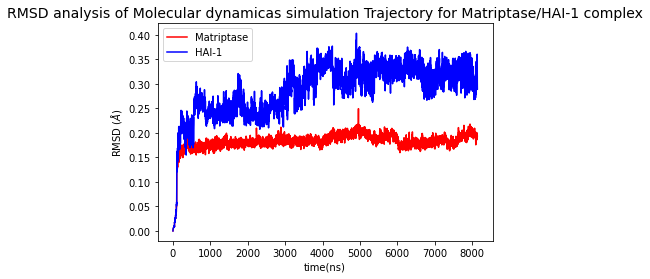

In [70]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

matriptase_sel=traj.topology.select("resid 0 to 240")
matriptase_traj = traj.atom_slice(matriptase_sel)
rmsd_matriptase=md.rmsd(matriptase_traj, matriptase_traj,0)

HAI1_sel=traj.topology.select("resid 241 to 302")
HAI1_traj = traj.atom_slice(HAI1_sel)
rmsd_HAI1=md.rmsd(HAI1_traj, HAI1_traj,0)


plt.plot(rmsd_matriptase, color="red", label="Matriptase") #a frame for *0.005 nanosecond
plt.plot(rmsd_HAI1, color="blue", label="HAI-1")
plt.xlabel("time(ns)")
plt.ylabel("RMSD ($\AA$)")
plt.title('RMSD analysis of Molecular dynamicas simulation Trajectory for Matriptase/HAI-1 complex', fontsize = 14)
plt.legend()

plt.show()

#### 2) Calculo de RMSF por residuo para cada molecula
Esto nos dirá qué partes de la estructura son más móviles y cuáles son más rígidas. Es probable que las partes más flexibles del sistema sean las más difíciles de equilibrar y muestrear bien.

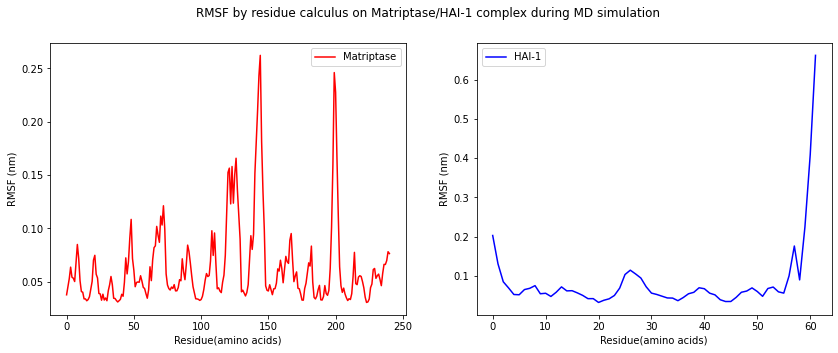

In [71]:
matriptase_sel2=matriptase_traj.topology.select("protein and name CA")
matriptase_traj2=matriptase_traj.atom_slice(matriptase_sel2)
rmsf_matriptase2=md.rmsf(matriptase_traj2[703:40705],matriptase_traj2[703:40705],0)

HAI1_sel2=HAI1_traj.topology.select("protein and name CA")
HAI1_traj2=HAI1_traj.atom_slice(HAI1_sel2)
rmsf_HAI1_2=md.rmsf(HAI1_traj2[703:40705],HAI1_traj2[703:40705],0)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
fig.suptitle('RMSF by residue calculus on Matriptase/HAI-1 complex during MD simulation')
ax1.plot(rmsf_matriptase2,color="red", label="Matriptase")
ax1.set_xlabel("Residue(amino acids)")
ax1.set_ylabel("RMSF (nm)")
ax1.legend()

ax2.plot(rmsf_HAI1_2, color="blue", label="HAI-1")
ax2.set_xlabel("Residue(amino acids)")
ax2.set_ylabel("RMSF (nm)")
ax2.legend()

#### 3) Calculo del radio de giro a lo largo de la trayectoria de la simulación

In [72]:
gyr_matriptase2=md.compute_rg(matriptase_traj2[703:40705])
gyr_HAI1_2=md.compute_rg(HAI1_traj2[703:40705])

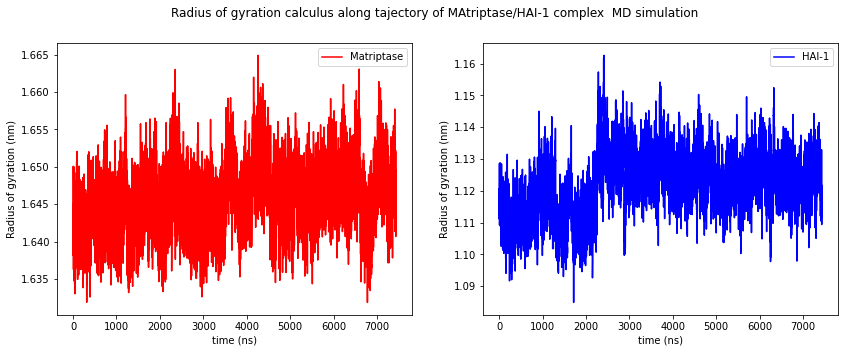

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
fig.suptitle('Radius of gyration calculus along tajectory of MAtriptase/HAI-1 complex  MD simulation')
ax1.plot(gyr_matriptase2,color="red", label="Matriptase")
ax1.set_xlabel("time (ns)")
ax1.set_ylabel("Radius of gyration (nm)")
ax1.legend()

ax2.plot(gyr_HAI1_2, color="blue", label="HAI-1")
ax2.set_xlabel("time (ns)")
ax2.set_ylabel("Radius of gyration (nm)")
ax2.legend()

#### 4) Procesamiento del calculo de RMSD entre todos los frames de la trayectoria

Los resultados obtenido del calculo de los valores de RMSD entre todas los frames de las trayectorias en las dos moleculas, usando el programa cpptraj incluido en el programa de dinámica molecular AMBER14 son los siguientes:
<img src="./Code_and_data/Figure-01-simulation.jpg">

Colectando de este plot la data correspondiente a los calculos de rmsd2 entre los 140 y 160 ns, para observar la distribución de los datos alrededor de ese rango

In [8]:
import pandas as pd
df_HAI_1_rmsd2 = pd.read_csv("./Code_and_data/4ISN-Y-M-N-Inhibitor-rms2d4-shorted.gnu",sep="\s+", header=None)
df_HAI_1_rmsd2

0       1      2
0      7175.0  7175.0  0.000
1      7175.0  7176.0  0.659
2      7175.0  7177.0  0.591
3      7175.0  7178.0  0.567
4      7175.0  7179.0  0.671
...       ...     ...    ...
27436  8175.0  8171.0  0.755
27437  8175.0  8172.0  0.650
27438  8175.0  8173.0  0.678
27439  8175.0  8174.0  0.564
27440  8175.0  8175.0  0.000

[27441 rows x 3 columns]

In [9]:
df_MT01_rmsd2 = pd.read_csv("./Code_and_data/4ISN-Y-M-N-Receptor-rms2d4-shorted.gnu",sep="\s+", header=None)
df_MT01_rmsd2

0       1      2
0      7175.0  7175.0  0.000
1      7175.0  7176.0  0.671
2      7175.0  7177.0  0.619
3      7175.0  7178.0  0.628
4      7175.0  7179.0  0.649
...       ...     ...    ...
27436  8175.0  8171.0  0.776
27437  8175.0  8172.0  0.625
27438  8175.0  8173.0  0.658
27439  8175.0  8174.0  0.744
27440  8175.0  8175.0  0.000

[27441 rows x 3 columns]

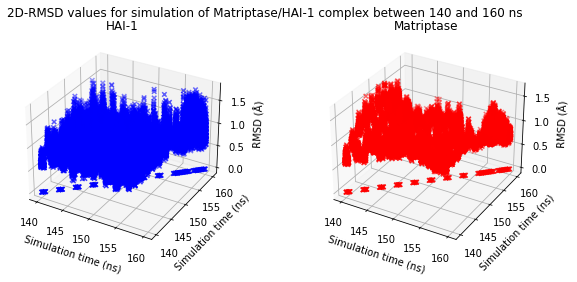

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

X1 = ((df_HAI_1_rmsd2[0]*(4))-702)*0.005
Y1 = ((df_HAI_1_rmsd2[1]*(4))-702)*0.005
Z1 = df_HAI_1_rmsd2[2]

X2 = ((df_MT01_rmsd2[0]*(4))-702)*0.005
Y2 = ((df_MT01_rmsd2[1]*(4))-702)*0.005
Z2 = df_MT01_rmsd2[2]


fig = plt.figure(figsize=plt.figaspect(0.40))
fig.suptitle('2D-RMSD values for simulation of Matriptase/HAI-1 complex between 140 and 160 ns')
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X1,Y1,Z1, marker="x", c="blue")
ax.set_title("HAI-1")
ax.set_xlabel("Simulation time (ns)")
ax.set_ylabel("Simulation time (ns)")
ax.set_zlabel("RMSD (Å)")

ax = fig.add_subplot(1, 2, 2, projection='3d')
#ax2 = plt.axes(projection='3d')
ax.scatter(X2,Y2,Z2, marker="x", c="red")
ax.set_title("Matriptase")
ax.set_xlabel("Simulation time (ns)")
ax.set_ylabel("Simulation time (ns)")
ax.set_zlabel("RMSD (Å)")

plt.show()

Graficando la distribución de los datos y proyectando una distribución normal sobre los mismos

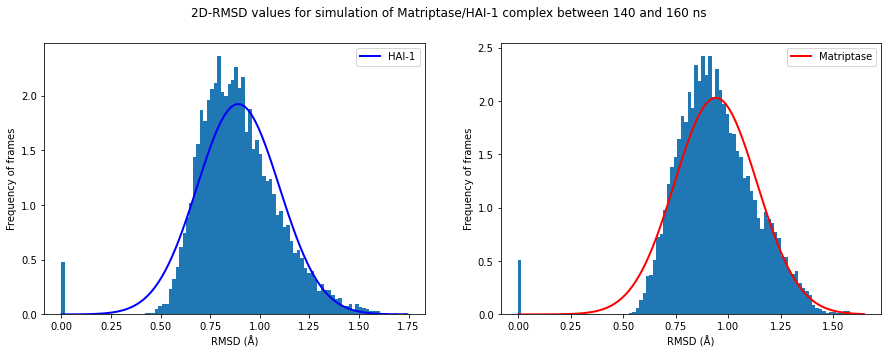

In [5]:
mu1=np.mean(Z1)
sigma1=np.std(Z1, ddof=1)

mu2=np.mean(Z2)
sigma2=np.std(Z2, ddof=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('2D-RMSD values for simulation of Matriptase/HAI-1 complex between 140 and 160 ns')

count1, bins1, ignored = ax1.hist(Z1, 100, density=1)
ax1.plot(bins1, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins1 - mu1)**2 / (2 * sigma1**2)), label="HAI-1",
         linewidth=2, color='blue')
ax1.set_xlabel("RMSD (Å)")
ax1.set_ylabel("Frequency of frames")
ax1.legend()

count2, bins2, ignored = ax2.hist(Z2, 100, density=1)

ax2.plot(bins2, 1/(sigma2 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins2 - mu2)**2 / (2 * sigma2**2) ), label="Matriptase",
         linewidth=2, color='r')
ax2.set_xlabel("RMSD (Å)")
ax2.set_ylabel("Frequency of frames")
ax2.legend()
plt.show()

#### 5) Analisis de estructura secundaria

In [62]:
#Secondary structure analysis
# Using the DSSP algorithm to assign secondary structure. In its simplest form, this returns an [n_frames, n_residues] 
# array where in each frame, each residue is labelled as 'H' (helical), 'E' (beta-strand), or 'C' (random coil)

ss = md.compute_dssp(trajreduced)
print (ss.shape)
print ("Secondary structure for initial structure of Matriptase ")
print(ss[0][0:240])
print("")
print ("Secondary structure for initial structure of HAI-1")
print(ss[0][241:302])
plt.show()

(1629, 303)
Secondary structure for initial structure of Matriptase 
['C' 'E' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E'
 'E' 'E' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'E'
 'E' 'E' 'E' 'C' 'C' 'H' 'H' 'H' 'C' 'C' 'E' 'C' 'C' 'E' 'C' 'C' 'C' 'C'
 'H' 'H' 'H' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'C'
 'C' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E'
 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C'
 'C' 'E' 'C' 'C' 'E' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'H' 'H

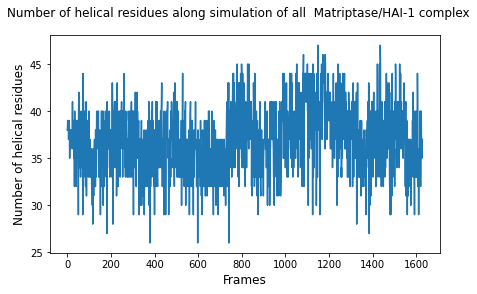

In [63]:
plt.figure(figsize=(7,4))
plt.suptitle
plt.suptitle('Number of helical residues along simulation of all  Matriptase/HAI-1 complex')
n_helical = (ss == 'H').sum(axis=1)
plt.xlabel('Frames', size=12)
plt.ylabel('Number of helical residues', size=12)
plt.plot(n_helical)
plt.show()

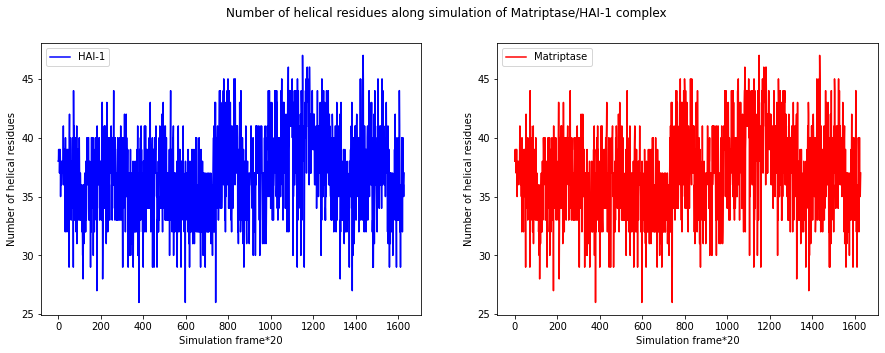

In [66]:
# Plotting the number of helical residues in each snapshot of trajectory for both molecules.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of helical residues along simulation of Matriptase/HAI-1 complex')
n_helical_HAI_1 = (ss == 'H').sum(axis=1)
ax1.plot(n_helical_HAI_1, label="HAI-1", color='blue')
ax1.set_xlabel("Simulation frame*20")
ax1.set_ylabel("Number of helical residues")
ax1.legend()

n_helical_MAT_1 = (ss == 'H').sum(axis=1)
ax2.plot(n_helical_HAI_1, label="Matriptase", color='red')
ax2.set_xlabel("Simulation frame*20")
ax2.set_ylabel("Number of helical residues")
ax2.legend()
plt.show()

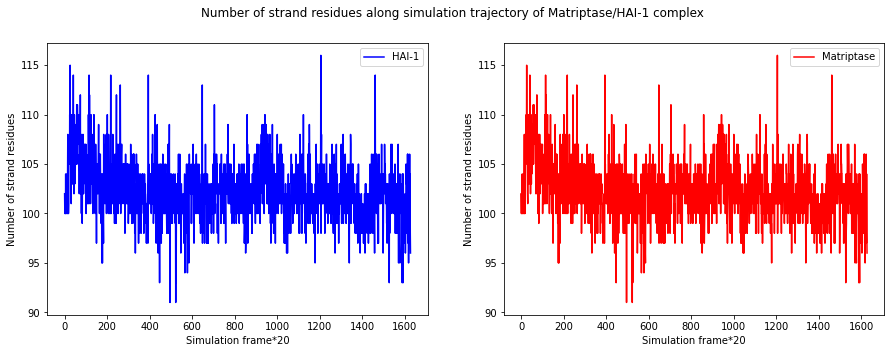

In [67]:
# Plotting the number of strand residues in each snapshot of trajectory for both molecules.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of strand residues along simulation trajectory of Matriptase/HAI-1 complex')
n_strand_HAI_1 = (ss == 'E').sum(axis=1)
ax1.plot(n_strand_HAI_1, label="HAI-1", color='blue')
ax1.set_xlabel("Simulation frame*20")
ax1.set_ylabel("Number of strand residues")
ax1.legend()

n_strand_MAT_1 = (ss == 'E').sum(axis=1)
ax2.plot(n_strand_MAT_1, label="Matriptase", color='red')
ax2.set_xlabel("Simulation frame*20")
ax2.set_ylabel("Number of strand residues")
ax2.legend()
plt.show()

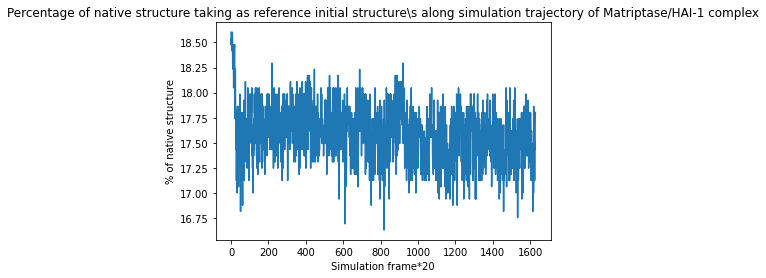

In [70]:
# Calculating the percentage of native structure for each snapshot (assuming 'native' means 'same as the first snapshot'):
plt.plot((ss == ss[0]).sum(axis=1) * 100 / len(trajreduced))
plt.title("Percentage of native structure taking as reference initial structure\s along simulation trajectory of Matriptase/HAI-1 complex")
plt.xlabel("Simulation frame*20")
plt.ylabel("% of native structure")
plt.show()

#### 6) Procesamiento del los datos de calculo de energía libre de unión para el complejo Matriptasa/HAI-1

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
df_PBSA_MHai_I = pd.read_csv("4ISN-APBS_data.txt",sep='\t',header=(0))
df_PBSA_MHai_I

Residue Chain Amino acid  Number  ΔG[Kcal mol-1]
0          1     A      VAL16      16          3.7082
1          2     A      VAL17      17          0.1362
2          3     A      GLY18      18         -0.0031
3          4     A      GLY19      19          0.0992
4          5     A      THR20      20         -0.0608
..       ...   ...        ...     ...             ...
298      299     B     0.0299      58          0.0026
299      300     B     0.0300      59          0.0114
300      301     B     0.0301      60          0.0084
301      302     B     0.0302      61          0.0005
302      303     B     0.0303      62          0.0077

[303 rows x 5 columns]

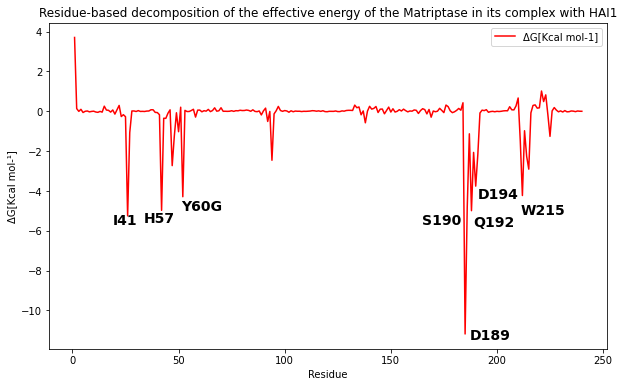

In [45]:
axM02=df_PBSA_MHai_I[0:240].plot(x='Residue', y='ΔG[Kcal mol-1]', 
                     title="Residue-based decomposition of the effective energy of the Matriptase in its complex with HAI1",
                    xlabel="Residue", ylabel="ΔG[Kcal mol-¹]",
                    figsize=(10,6), color="red")
axM02.annotate('I41', xy=(25, -5.5), xytext=(25, -5.5), color='k', weight='bold', ha='center', va='center', size=14)
axM02.annotate('H57', xy=(41, -5.4), xytext=(41, -5.4), color='k', weight='bold', ha='center', va='center', size=14)
axM02.annotate('Y60G', xy=(51, -4.8), xytext=(51, -4.8), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('D189', xy=(187, -11.25), xytext=(187, -11.25), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('S190', xy=(187, -5.5), xytext=(183, -5.5), color='k', weight='bold', ha='right', va='center', size=14)
axM02.annotate('Q192', xy=(189, -5.6), xytext=(189, -5.6), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('D194', xy=(191, -4.2), xytext=(191, -4.2), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('W215', xy=(211, -5.0), xytext=(211, -5.0), color='k', weight='bold', ha='left', va='center', size=14)

plt.show()

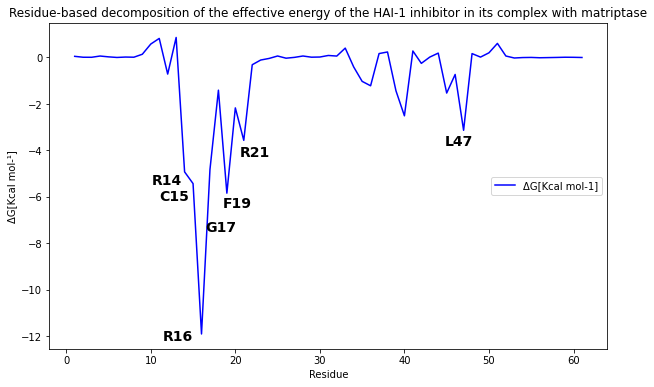

In [70]:
axHai2=df_PBSA_MHai_I[241:302].plot(x='Number', y='ΔG[Kcal mol-1]', 
                     title="Residue-based decomposition of the effective energy of the HAI-1 inhibitor in its complex with matriptase",
                    xlabel="Residue", ylabel="ΔG[Kcal mol-¹]",
                    figsize=(10,6), color="blue")

axHai2.annotate('R14', xy=(13.7, -5.3), xytext=(13.7, -5.3), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('C15', xy=(14.5, -6.0), xytext=(14.5, -6.0), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('R16', xy=(15.0, -12.0), xytext=(15.0, -12.0), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('G17', xy=(16.5, -7.3), xytext=(16.5, -7.3), color='k', weight='bold', ha='left', va='center', size=14)
axHai2.annotate('F19', xy=(18.5, -6.3), xytext=(18.5, -6.3), color='k', weight='bold', ha='left', va='center', size=14)
axHai2.annotate('R21', xy=(20.5, -4.1), xytext=(20.5, -4.1), color='k', weight='bold', ha='left', va='center', size=14)
axHai2.annotate('L47', xy=(46.5, -3.6), xytext=(46.5, -3.6), color='k', weight='bold', ha='center', va='center', size=14)
axHai2.legend(loc='center right')

plt.show()

#### 7) Cálculo de la superficie accesible al solvente alo largo de la simulación para los residuos con mayor contribución a la energía libre de unión

In [74]:
#To have a better idea of solvent accession the best way is not considering only alpha carbon for each residue
#if not all atoms of residue and take an average
#a) For Arg14 residue
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
HAI1_Arg14_APBS_Sel=traj.topology.select("resid 254")
HAI1_APBS_Arg14_traj= traj.atom_slice(HAI1_Arg14_APBS_Sel)
sasa_HAI1_Arg14_traj =md.shrake_rupley(HAI1_APBS_Arg14_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Arg14=[np.sum(sasa_HAI1_Arg14_traj[i]) for i in range(len(sasa_HAI1_Arg14_traj))]

In [75]:
#b) For Cys15 residue
HAI1_Cys15_APBS_Sel=traj.topology.select("resid 255")
HAI1_APBS_Cys15_traj= traj.atom_slice(HAI1_Cys15_APBS_Sel)
sasa_HAI1_Cys15_traj =md.shrake_rupley(HAI1_APBS_Cys15_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Cys15=[np.sum(sasa_HAI1_Cys15_traj[i]) for i in range(len(sasa_HAI1_Cys15_traj))]

In [82]:
#c) For Arg16 residue
HAI1_Arg16_APBS_Sel=traj.topology.select("resid 256")
HAI1_APBS_Arg16_traj= traj.atom_slice(HAI1_Arg16_APBS_Sel)
sasa_HAI1_Arg16_traj =md.shrake_rupley(HAI1_APBS_Arg16_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Arg16=[np.sum(sasa_HAI1_Arg16_traj[i]) for i in range(len(sasa_HAI1_Arg16_traj))]

In [77]:
#d) For Gly17 residue
HAI1_Gly17_APBS_Sel=traj.topology.select("resid 257")
HAI1_APBS_Gly17_traj= traj.atom_slice(HAI1_Gly17_APBS_Sel)
sasa_HAI1_Gly17_traj =md.shrake_rupley(HAI1_APBS_Gly17_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Gly17=[np.sum(sasa_HAI1_Gly17_traj[i]) for i in range(len(sasa_HAI1_Gly17_traj))]

In [78]:
#d) For Phe19 residue
HAI1_Phe19_APBS_Sel=traj.topology.select("resid 259")
HAI1_APBS_Phe19_traj= traj.atom_slice(HAI1_Phe19_APBS_Sel)
sasa_HAI1_Phe19_traj =md.shrake_rupley(HAI1_APBS_Phe19_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Phe19=[np.sum(sasa_HAI1_Phe19_traj[i]) for i in range(len(sasa_HAI1_Phe19_traj))]

In [83]:
#e) For Arg21 residue
HAI1_Arg21_APBS_Sel=traj.topology.select("resid 261")
HAI1_APBS_Arg21_traj= traj.atom_slice(HAI1_Arg21_APBS_Sel)
sasa_HAI1_Arg21_traj =md.shrake_rupley(HAI1_APBS_Arg21_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Arg21=[np.sum(sasa_HAI1_Arg21_traj[i]) for i in range(len(sasa_HAI1_Arg21_traj))]

In [80]:
#f) For Leu47 residue
HAI1_Leu47_APBS_Sel=traj.topology.select("resid 287")
HAI1_APBS_Leu47_traj= traj.atom_slice(HAI1_Leu47_APBS_Sel)
sasa_HAI1_Leu47_traj =md.shrake_rupley(HAI1_APBS_Leu47_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI1_Leu47=[np.sum(sasa_HAI1_Leu47_traj[i]) for i in range(len(sasa_HAI1_Leu47_traj))]

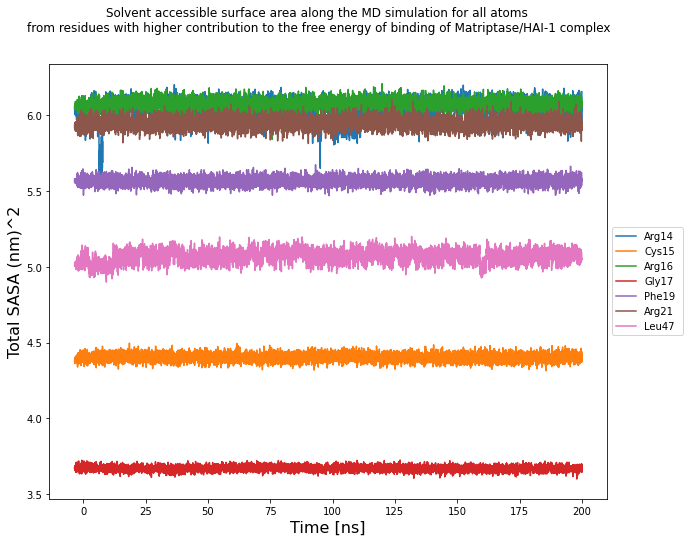

In [84]:
#Plotting the 6 residues values
from matplotlib.pylab import *
HAI1_APBS_Sel=traj.topology.select("resid 254 255 256 257 259 261 287 and name CA")
HAI1_APBS_traj= traj.atom_slice(HAI1_APBS_Sel)
plt.figure(figsize=(10,8))
plt.suptitle('Solvent accessible surface area along the MD simulation for all atoms \nfrom residues with higher contribution to the free energy of binding of Matriptase/HAI-1 complex')
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Arg14, label="Arg14")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Cys15, label="Cys15")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Arg16, label="Arg16")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Gly17, label="Gly17")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Phe19 , label="Phe19 ")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Arg21, label="Arg21")
plot((((HAI1_APBS_traj.time)*(5))-702)*0.005, sasa_HAI1_Leu47, label="Leu47")
xlabel('Time [ns]', size=16)
ylabel('Total SASA (nm)^2', size=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

## Procesamiento simulación del Complejo Matriptasa/HAI-2

Cargando primero las trayectorias de la simulación

In [1]:
import mdtraj as md
trajS = md.load_dcd('./Code_and_data/4ISN_4U32-Y-M-N-Reduced.dcd', top='./Code_and_data/4ISN_4U32-Reduced.pdb')
print(trajS)

<mdtraj.Trajectory with 8870 frames, 4482 atoms, 295 residues, and unitcells>


In [3]:
import mdtraj as md
stride = 5
trajreducedS = md.load_dcd('./Code_and_data/4ISN_4U32-Y-M-N-Reduced.dcd', top='./Code_and_data/4ISN_4U32-Reduced.pdb', stride=stride)
print(trajreducedS)

<mdtraj.Trajectory with 1774 frames, 4482 atoms, 295 residues, and unitcells>


#### 1) Calculo de RMSD respecto a la estructura inicial
Los RMSD por pares son una forma eficaz de ver rápidamente similitudes y diferencias en las conformaciones (medidas por RMSD) a lo largo de una trayectoria.

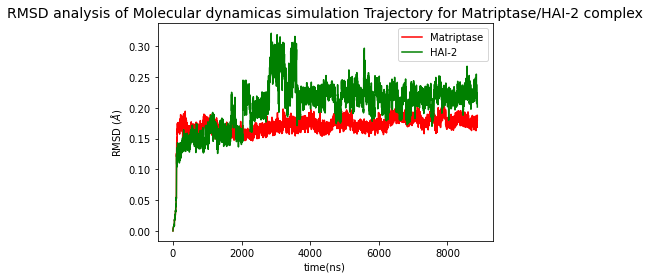

In [51]:
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

matriptase2_sel=trajS.topology.select("resid 0 to 240")
matriptase2_traj = trajS.atom_slice(matriptase2_sel)
rmsd_matriptase2=md.rmsd(matriptase2_traj, matriptase2_traj,0)

HAI2_sel=trajS.topology.select("resid 241 to 294")
HAI2_traj = trajS.atom_slice(HAI2_sel)
rmsd_HAI2=md.rmsd(HAI2_traj, HAI2_traj,0)


plt.plot(rmsd_matriptase2, color="red", label="Matriptase") #a frame for *0.005 nanosecond
plt.plot(rmsd_HAI2, color="green", label="HAI-2")
plt.xlabel("time(ns)")
plt.ylabel("RMSD ($\AA$)")
plt.title('RMSD analysis of Molecular dynamicas simulation Trajectory for Matriptase/HAI-2 complex', fontsize = 14)
plt.legend()

plt.show()

#### 2) Calculo de RMSF por residuo para cada molecula

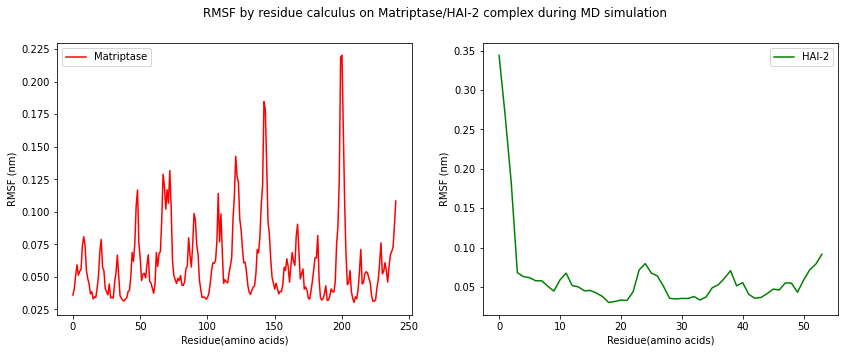

In [82]:
matriptase2_sel2=matriptase2_traj.topology.select("protein and name CA")
matriptase2_traj2=matriptase2_traj.atom_slice(matriptase2_sel2)
rmsf_matriptase22=md.rmsf(matriptase2_traj2[140:8870],matriptase2_traj2[140:8870],0)

HAI2_sel2=HAI2_traj.topology.select("protein and name CA")
HAI2_traj2=HAI2_traj.atom_slice(HAI2_sel2)
rmsf_HAI2_2=md.rmsf(HAI2_traj2[140:8870],HAI2_traj2[140:8870],0)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
fig.suptitle('RMSF by residue calculus on Matriptase/HAI-2 complex during MD simulation')
ax1.plot(rmsf_matriptase22,color="red", label="Matriptase")
ax1.set_xlabel("Residue(amino acids)")
ax1.set_ylabel("RMSF (nm)")
ax1.legend()

ax2.plot(rmsf_HAI2_2, color="green", label="HAI-2")
ax2.set_xlabel("Residue(amino acids)")
ax2.set_ylabel("RMSF (nm)")
ax2.legend()

#### 3) Calculo del radio de giro a lo largo de la trayectoria de la simulación

In [83]:
gyr_matriptase22=md.compute_rg(matriptase2_traj2[140:8870])
gyr_HAI2_2=md.compute_rg(HAI2_traj2[140:8870])

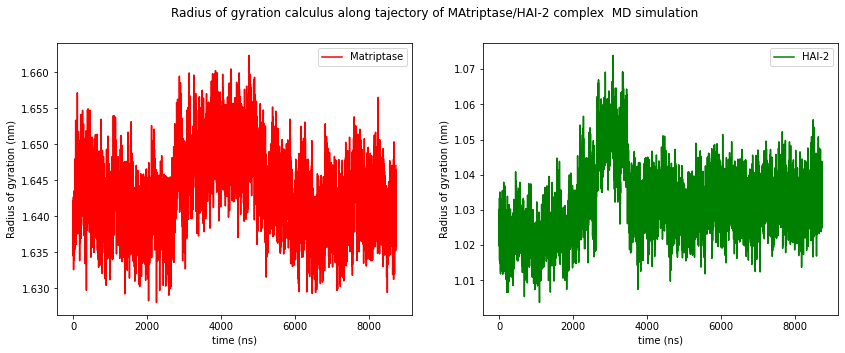

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 5)
fig.suptitle('Radius of gyration calculus along tajectory of MAtriptase/HAI-2 complex  MD simulation')
ax1.plot(gyr_matriptase22,color="red", label="Matriptase")
ax1.set_xlabel("time (ns)")
ax1.set_ylabel("Radius of gyration (nm)")
ax1.legend()

ax2.plot(gyr_HAI2_2, color="green", label="HAI-2")
ax2.set_xlabel("time (ns)")
ax2.set_ylabel("Radius of gyration (nm)")
ax2.legend()

#### 4) Procesamiento del calculo de RMSD entre todos los frames de la trayectoria

Los resultados obtenido del calculo de los valores de RMSD entre todas los frames de las trayectorias en las dos moleculas, usando el programa cpptraj incluido en el programa de dinámica molecular AMBER14 son los siguientes:
<img src="./Code_and_data/Figure-03-simulation.png">

Colectando de este plot la data correspondiente a los calculos de rmsd2 entre los 140 y 160 ns, para observar la distribución de los datos alrededor de ese rango

In [5]:
import pandas as pd
df_HAI_2_rmsd2 = pd.read_csv("./Code_and_data/4ISN_4U32-Y-M-N-Inhibitor-rms2d4-shorted.gnu",sep="\s+", header=None)
df_HAI_2_rmsd2

0       1      2
0      7175.0  7175.0  0.000
1      7175.0  7176.0  0.432
2      7175.0  7177.0  0.482
3      7175.0  7178.0  0.570
4      7175.0  7179.0  0.629
...       ...     ...    ...
27436  8175.0  8171.0  0.490
27437  8175.0  8172.0  0.635
27438  8175.0  8173.0  0.547
27439  8175.0  8174.0  0.494
27440  8175.0  8175.0  0.000

[27441 rows x 3 columns]

In [6]:
df_MT02_rmsd2 = pd.read_csv("./Code_and_data/4ISN_4U32-Y-M-N-Receptor-rms2d4-shorted.gnu",sep="\s+", header=None)
df_MT02_rmsd2

0       1      2
0      7175.0  7175.0  0.000
1      7175.0  7176.0  0.535
2      7175.0  7177.0  0.563
3      7175.0  7178.0  0.649
4      7175.0  7179.0  0.655
...       ...     ...    ...
27436  8175.0  8171.0  0.681
27437  8175.0  8172.0  0.702
27438  8175.0  8173.0  0.608
27439  8175.0  8174.0  0.682
27440  8175.0  8175.0  0.000

[27441 rows x 3 columns]

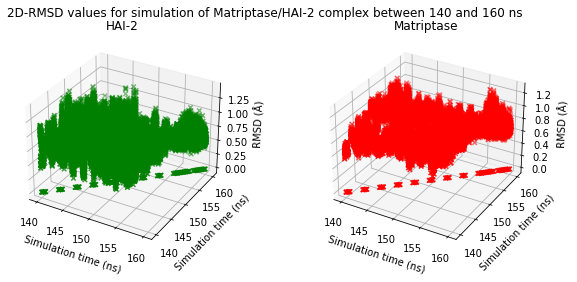

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

X1 = ((df_HAI_2_rmsd2[0]*(4))-702)*0.005
Y1 = ((df_HAI_2_rmsd2[1]*(4))-702)*0.005
Z1 = df_HAI_2_rmsd2[2]

X2 = ((df_MT02_rmsd2[0]*(4))-702)*0.005
Y2 = ((df_MT02_rmsd2[1]*(4))-702)*0.005
Z2 = df_MT02_rmsd2[2]


fig = plt.figure(figsize=plt.figaspect(0.40))
fig.suptitle('2D-RMSD values for simulation of Matriptase/HAI-2 complex between 140 and 160 ns')
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X1,Y1,Z1, marker="x", c="green")
ax.set_title("HAI-2")
ax.set_xlabel("Simulation time (ns)")
ax.set_ylabel("Simulation time (ns)")
ax.set_zlabel("RMSD (Å)")

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X2,Y2,Z2, marker="x", c="red")
ax.set_title("Matriptase")
ax.set_xlabel("Simulation time (ns)")
ax.set_ylabel("Simulation time (ns)")
ax.set_zlabel("RMSD (Å)")

plt.show()

Graficando la distribución de los datos y proyectando una distribución normal sobre los mismos

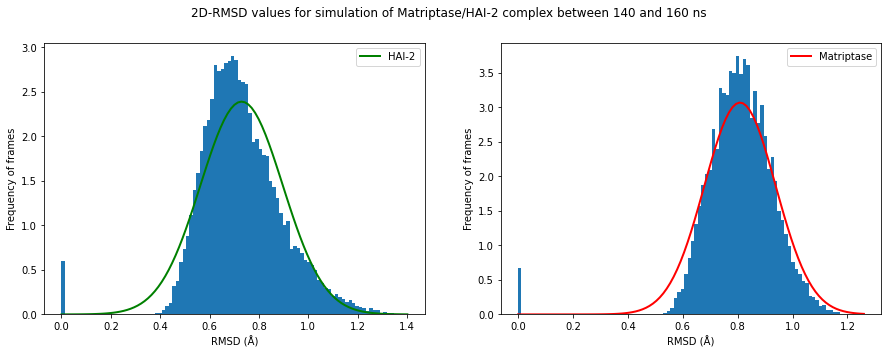

In [95]:
mu21=np.mean(Z1)
sigma21=np.std(Z1, ddof=1)

mu22=np.mean(Z2)
sigma22=np.std(Z2, ddof=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('2D-RMSD values for simulation of Matriptase/HAI-2 complex between 140 and 160 ns')

count21, bins21, ignored = ax1.hist(Z1, 100, density=1)
ax1.plot(bins21, 1/(sigma21 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins21 - mu21)**2 / (2 * sigma21**2)), label="HAI-2",
         linewidth=2, color='green')
ax1.set_xlabel("RMSD (Å)")
ax1.set_ylabel("Frequency of frames")
ax1.legend()

count22, bins22, ignored = ax2.hist(Z2, 100, density=1)

ax2.plot(bins22, 1/(sigma22 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins22 - mu22)**2 / (2 * sigma22**2) ), label="Matriptase",
         linewidth=2, color='r')
ax2.set_xlabel("RMSD (Å)")
ax2.set_ylabel("Frequency of frames")
ax2.legend()
plt.show()

#### 5) Analisis de estructura secundaria

In [72]:
#Secondary structure analysis
# Using the DSSP algorithm to assign secondary structure. In its simplest form, this returns an [n_frames, n_residues] 
# array where in each frame, each residue is labelled as 'H' (helical), 'E' (beta-strand), or 'C' (random coil)

ss = md.compute_dssp(trajreducedS)
print (ss.shape)
print ("Secondary structure for initial structure of Matriptase ")
print(ss[0][0:240])
print("")
print ("Secondary structure for initial structure of HAI-2")
print(ss[0][241:295])
plt.show()

(1774, 295)
Secondary structure for initial structure of Matriptase 
['C' 'E' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E'
 'E' 'E' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'E'
 'E' 'E' 'E' 'C' 'C' 'H' 'H' 'H' 'C' 'C' 'E' 'C' 'C' 'E' 'C' 'C' 'C' 'C'
 'H' 'H' 'H' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C'
 'C' 'E' 'C' 'C' 'E' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'E' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'C'
 'C' 'C' 'C' 'C' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E'
 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'C'
 'C' 'E' 'C' 'C' 'E' 'C' 'E' 'E' 'E' 'E' 'E' 'C' 'H' 'H

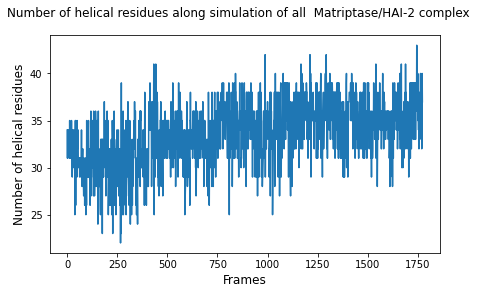

In [73]:
plt.figure(figsize=(7,4))
plt.suptitle
plt.suptitle('Number of helical residues along simulation of all  Matriptase/HAI-2 complex')
n_helical = (ss == 'H').sum(axis=1)
plt.xlabel('Frames', size=12)
plt.ylabel('Number of helical residues', size=12)
plt.plot(n_helical)
plt.show()

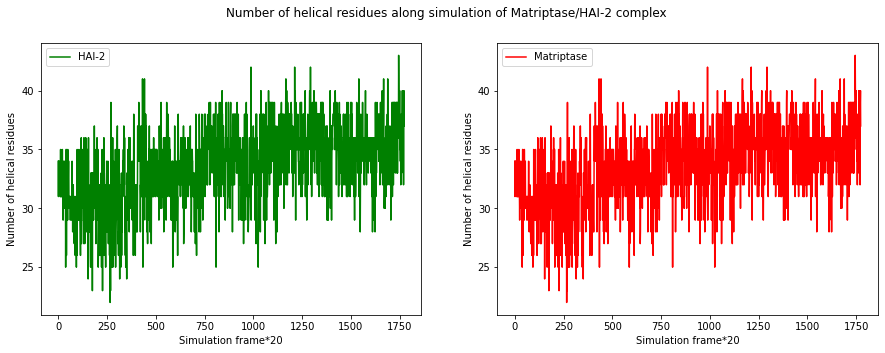

In [63]:
# Plotting the number of helical residues in each snapshot of trajectory for both molecules.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of helical residues along simulation of Matriptase/HAI-2 complex')
n_helical_HAI_2 = (ss == 'H').sum(axis=1)
ax1.plot(n_helical_HAI_2, label="HAI-2", color='green')
ax1.set_xlabel("Simulation frame*20")
ax1.set_ylabel("Number of helical residues")
ax1.legend()

n_helical_MAT_2 = (ss == 'H').sum(axis=1)
ax2.plot(n_helical_HAI_2, label="Matriptase", color='red')
ax2.set_xlabel("Simulation frame*20")
ax2.set_ylabel("Number of helical residues")
ax2.legend()
plt.show()

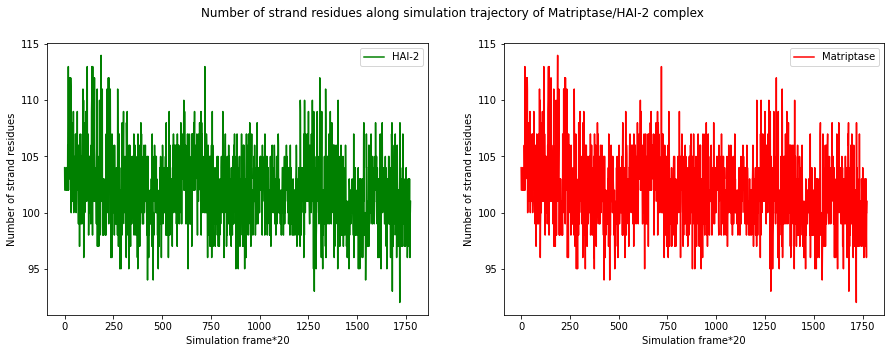

In [74]:
# Plotting the number of strand residues in each snapshot of trajectory for both molecules.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Number of strand residues along simulation trajectory of Matriptase/HAI-2 complex')
n_strand_HAI_2 = (ss == 'E').sum(axis=1)
ax1.plot(n_strand_HAI_2, label="HAI-2", color='green')
ax1.set_xlabel("Simulation frame*20")
ax1.set_ylabel("Number of strand residues")
ax1.legend()

n_strand_MAT_2 = (ss == 'E').sum(axis=1)
ax2.plot(n_strand_MAT_2, label="Matriptase", color='red')
ax2.set_xlabel("Simulation frame*20")
ax2.set_ylabel("Number of strand residues")
ax2.legend()
plt.show()

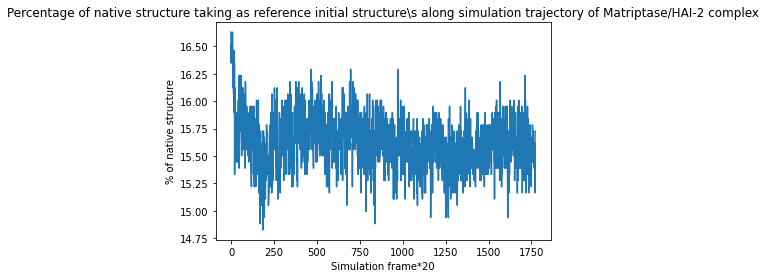

In [65]:
# Calculating the percentage of native structure for each snapshot (assuming 'native' means 'same as the first snapshot'):
plt.plot((ss == ss[0]).sum(axis=1) * 100 / len(trajreducedS))
plt.title("Percentage of native structure taking as reference initial structure\s along simulation trajectory of Matriptase/HAI-2 complex")
xlabel("Simulation frame*20")
ylabel("% of native structure")
plt.show()

#### 6) Procesamiento del los datos de calculo de energía libre de unión para el complejo Matriptasa/HAI-2

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
df_PBSA_MHai_II = pd.read_csv("4ISN_4U32-APBS_data.txt",sep='\t',header=(0))
df_PBSA_MHai_II

Residue Chain Amino acid  Number  ΔG[Kcal mol-1]
0          1     A      VAL16      16            2.25
1          2     A      VAL17      17            0.02
2          3     A      GLY18      18            0.00
3          4     A      GLY19      19            0.06
4          5     A      THR20      20           -0.02
..       ...   ...        ...     ...             ...
290      291     B      CYS51      51            0.00
291      292     B      LEU52      52            0.00
292      293     B      LYS53      53           -0.31
293      294     B      LYS54      54           -0.23
294      295     B      CYS55      55            0.37

[295 rows x 5 columns]

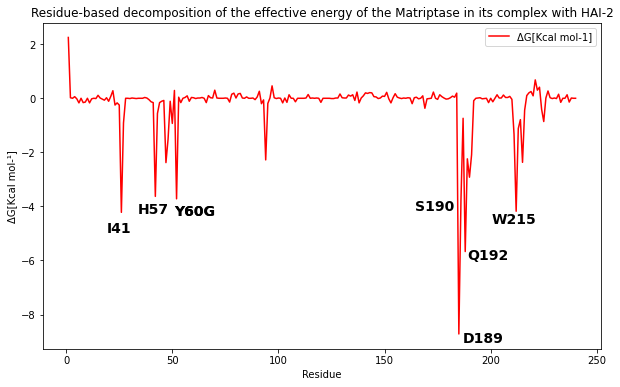

In [39]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
axM02=df_PBSA_MHai_II[0:240].plot(x='Residue', y='ΔG[Kcal mol-1]', 
                     title="Residue-based decomposition of the effective energy of the Matriptase in its complex with HAI2",
                    xlabel="Residue", ylabel="ΔG[Kcal mol-¹]",
                    figsize=(10,6), color="red")
axM02.annotate('I41', xy=(25, -4.8), xytext=(25, -4.8), color='k', weight='bold', ha='center', va='center', size=14)
axM02.annotate('H57', xy=(41, -4.1), xytext=(41, -4.1), color='k', weight='bold', ha='center', va='center', size=14)
axM02.annotate('Y60G', xy=(51, -4.2), xytext=(51, -4.2), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('Y60G', xy=(51, -4.2), xytext=(51, -4.2), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('D189', xy=(187, -8.9), xytext=(187, -8.9), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('S190', xy=(187, -4.0), xytext=(183, -4.0), color='k', weight='bold', ha='right', va='center', size=14)
axM02.annotate('Q192', xy=(189, -5.8), xytext=(189, -5.8), color='k', weight='bold', ha='left', va='center', size=14)
axM02.annotate('W215', xy=(211, -4.5), xytext=(211, -4.5), color='k', weight='bold', ha='center', va='center', size=14)

plt.show()

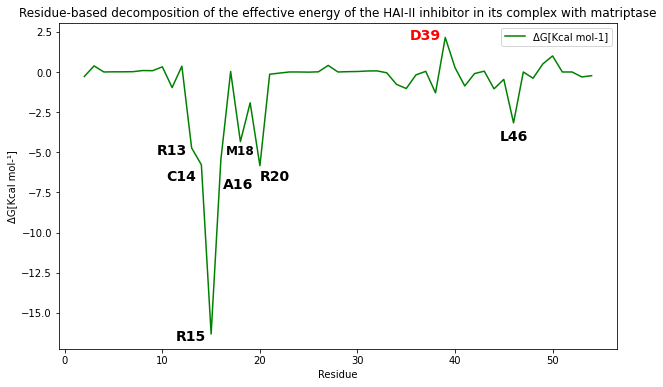

In [75]:
axHai2=df_PBSA_MHai_II[241:294].plot(x='Number', y='ΔG[Kcal mol-1]', 
                     title="Residue-based decomposition of the effective energy of the HAI-II inhibitor in its complex with matriptase",
                    xlabel="Residue", ylabel="ΔG[Kcal mol-¹]",
                    figsize=(10,6), color="green")

axHai2.annotate('R13', xy=(12.5, -4.9), xytext=(12.5, -4.9), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('C14', xy=(13.5, -6.5), xytext=(13.5, -6.5), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('R15', xy=(14.5, -16.5), xytext=(14.5, -16.5), color='k', weight='bold', ha='right', va='center', size=14)
axHai2.annotate('A16', xy=(16.2, -7.0), xytext=(16.2, -7.0), color='k', weight='bold', ha='left', va='center', size=14)
axHai2.annotate('M18', xy=(18.0, -4.9), xytext=(18.0, -4.9), color='k', weight='bold', ha='center', va='center', size=12)
axHai2.annotate('R20', xy=(20.0, -6.5), xytext=(20.0, -6.5), color='k', weight='bold', ha='left', va='center', size=14)
axHai2.annotate('L46', xy=(46.0, -4.0), xytext=(46.0, -4.0), color='k', weight='bold', ha='center', va='center', size=14)
axHai2.annotate('D39', xy=(38.5, 2.3), xytext=(38.5, 2.3), color='r', weight='bold', ha='right', va='center', size=14)
plt.show()

#### 7) Cálculo de la superficie accesible al solvente alo largo de la simulación para los residuos con mayor contribución a la energía libre de unión

In [17]:
#Compute the solvent accessible surface area of each atom or residue in each simulation frame in this case alpha carbon
from matplotlib.pylab import *
import mdtraj as md
HAI2_APBS_Sel=trajS.topology.select("resid 252 253 254 255 257 259 285 and name CA")
HAI2_APBS_traj= trajS.atom_slice(HAI2_APBS_Sel)
sasa_HAI2_traj =md.shrake_rupley(HAI2_APBS_traj, probe_radius=0.28, n_sphere_points=960*4)
print('sasa data shape', sasa_HAI2_traj.shape)

sasa data shape (8730, 7)


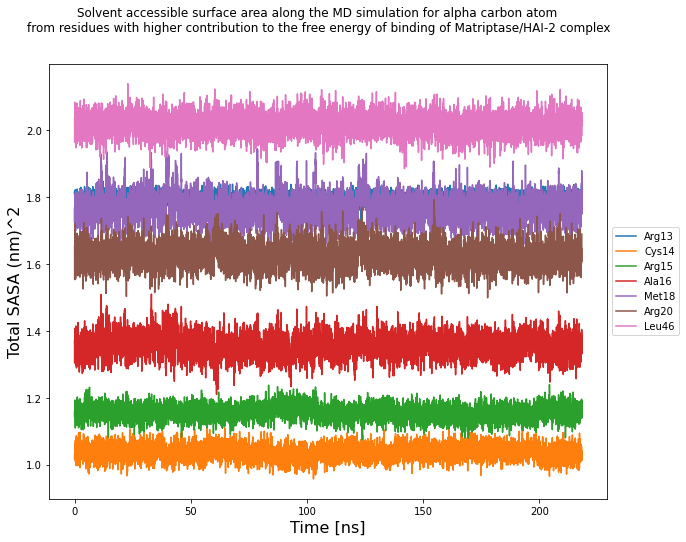

In [86]:
HAI2_residues= ["Arg13", "Cys14", "Arg15", "Ala16", "Met18", "Arg20", "Leu46"]
plt.figure(figsize=(10,8))
plt.suptitle('Solvent accessible surface area along the MD simulation for alpha carbon atom \nfrom residues with higher contribution to the free energy of binding of Matriptase/HAI-2 complex')
plot((((HAI2_APBS_traj.time[140:8870])*(5))-702)*0.005, sasa_HAI2_traj)
xlabel('Time [ns]', size=16)
ylabel('Total SASA (nm)^2', size=16)
plt.legend(labels=HAI2_residues, loc='center left', bbox_to_anchor=(1, 0.5))
show()

In [3]:
#To have a better idea of solvent accession the best way is not considering only alpha carbon for each residue
#if not all atoms of residue and take an average
#a) For Arg13 residue
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np
HAI2_Arg13_APBS_Sel=trajS.topology.select("resid 252")
HAI2_APBS_Arg13_traj= trajS.atom_slice(HAI2_Arg13_APBS_Sel)
sasa_HAI2_Arg13_traj =md.shrake_rupley(HAI2_APBS_Arg13_traj, probe_radius=0.28, n_sphere_points=960*4)


In [4]:
sasa_HAI2_Arg13=[np.sum(sasa_HAI2_Arg13_traj[i]) for i in range(len(sasa_HAI2_Arg13_traj))]

In [5]:
#b) For Cys14 residue
HAI2_Cys14_APBS_Sel=trajS.topology.select("resid 253")
HAI2_APBS_Cys14_traj= trajS.atom_slice(HAI2_Cys14_APBS_Sel)
sasa_HAI2_Cys14_traj =md.shrake_rupley(HAI2_APBS_Cys14_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Cys14=[np.sum(sasa_HAI2_Cys14_traj[i]) for i in range(len(sasa_HAI2_Cys14_traj))]

In [6]:
#c) For Arg15 residue
HAI2_Arg15_APBS_Sel=trajS.topology.select("resid 254")
HAI2_APBS_Arg15_traj= trajS.atom_slice(HAI2_Arg15_APBS_Sel)
sasa_HAI2_Arg15_traj =md.shrake_rupley(HAI2_APBS_Arg15_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Arg15=[np.sum(sasa_HAI2_Arg15_traj[i]) for i in range(len(sasa_HAI2_Arg15_traj))]

In [8]:
#d) For Ala16 residue
HAI2_Ala16_APBS_Sel=trajS.topology.select("resid 255")
HAI2_APBS_Ala16_traj= trajS.atom_slice(HAI2_Ala16_APBS_Sel)
sasa_HAI2_Ala16_traj =md.shrake_rupley(HAI2_APBS_Ala16_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Ala16=[np.sum(sasa_HAI2_Ala16_traj[i]) for i in range(len(sasa_HAI2_Ala16_traj))]

In [9]:
#e) For Met18 residue
HAI2_Met18_APBS_Sel=trajS.topology.select("resid 257")
HAI2_APBS_Met18_traj= trajS.atom_slice(HAI2_Met18_APBS_Sel)
sasa_HAI2_Met18_traj =md.shrake_rupley(HAI2_APBS_Met18_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Met18=[np.sum(sasa_HAI2_Met18_traj[i]) for i in range(len(sasa_HAI2_Met18_traj))]

In [10]:
#f) For Arg20 residue
HAI2_Arg20_APBS_Sel=trajS.topology.select("resid 259")
HAI2_APBS_Arg20_traj= trajS.atom_slice(HAI2_Arg20_APBS_Sel)
sasa_HAI2_Arg20_traj =md.shrake_rupley(HAI2_APBS_Arg20_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Arg20=[np.sum(sasa_HAI2_Arg20_traj[i]) for i in range(len(sasa_HAI2_Arg20_traj))]

In [11]:
#g) For Leu46 residue
HAI2_Leu46_APBS_Sel=trajS.topology.select("resid 285")
HAI2_APBS_Leu46_traj= trajS.atom_slice(HAI2_Leu46_APBS_Sel)
sasa_HAI2_Leu46_traj =md.shrake_rupley(HAI2_APBS_Leu46_traj, probe_radius=0.28, n_sphere_points=960*4)
sasa_HAI2_Leu46=[np.sum(sasa_HAI2_Leu46_traj[i]) for i in range(len(sasa_HAI2_Leu46_traj))]

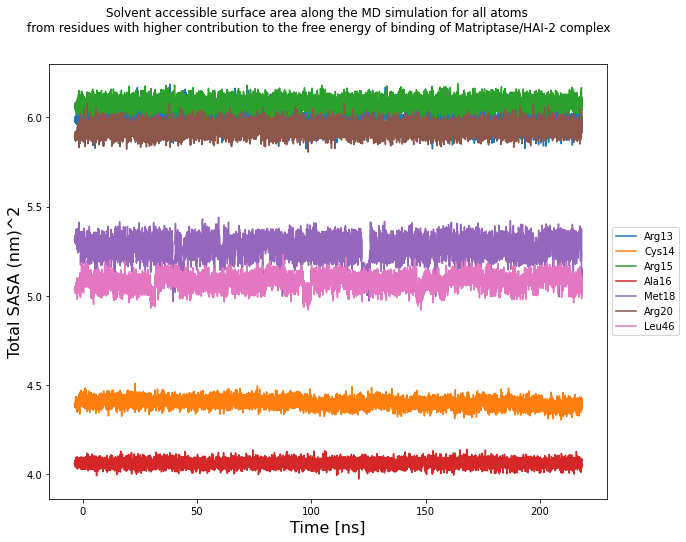

In [14]:
#Plotting the 6 residues values
from matplotlib.pylab import *
HAI2_APBS_Sel=trajS.topology.select("resid 252 253 254 255 257 259 285 and name CA")
HAI2_APBS_traj= trajS.atom_slice(HAI2_APBS_Sel)
plt.figure(figsize=(10,8))
plt.suptitle('Solvent accessible surface area along the MD simulation for all atoms \nfrom residues with higher contribution to the free energy of binding of Matriptase/HAI-2 complex')
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Arg13, label="Arg13")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Cys14, label="Cys14")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Arg15, label="Arg15")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Ala16, label="Ala16")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Met18, label="Met18")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Arg20, label="Arg20")
plot((((HAI2_APBS_traj.time)*(5))-702)*0.005, sasa_HAI2_Leu46, label="Leu46")
xlabel('Time [ns]', size=16)
ylabel('Total SASA (nm)^2', size=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
show()

# ANALISIS COMBINADO

### a) Mann-Whitney U Test

Cuando obtuvimos la distribución de los datos de rmsd para las dos simulaciones, observamos que las mismas no se ajustan exactamente auna distribución gaussiana, por ello para comparar ambos sets de datos usaremos el Mann-Whitney U test.
La prueba U de Mann-Whitney es una prueba de hipótesis nula que se utiliza para detectar diferencias entre dos conjuntos de datos independientes. La prueba es específicamente para distribuciones no paramétricas, que no asumen una distribución específica para un conjunto de datos. Debido a esto, la prueba U de Mann-Whitney se puede aplicar a cualquier distribución, sea gaussiana o no.

El analisis tomando como hipótesis nula de que las dos distribuciones son idénticas, nos dara dos parametros:
#### U-statistic: 
El estadístico U se interpreta usando una tabla "two-tailed test table", donde la tabla contiene valores críticos de U. Para rechazar la hipótesis nula en α = 0.05, la U obtenida de la prueba debe estar por debajo del valor crítico de U encontrado en [test table](http://ocw.umb.edu/psychology/psych-270/other-materials/RelativeResourceManager.pdf).
#### p-value
Valor p asociado con la prueba. Cuanto menor sea el valor p, más fuerte será la evidencia en contra de la hipótesis nula. Como regla general, cuando el valor p está por debajo de 0.05, la hipótesis nula puede rechazarse.

207637880.5
the p-value according to Mann-Whitney U test is  0.0
There is significative differences in the distribution of rmsd values between both samples


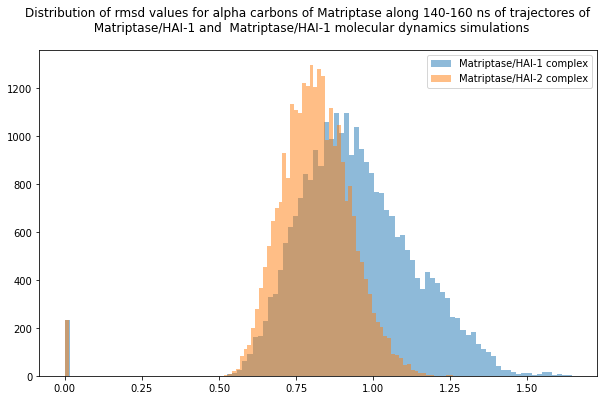

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
#Calculando si existen diferencias significativas entre la distribución de los datos de rmsd 
#para la matriptasa en ambas simulaciones
distribution_1= df_MT01_rmsd2[2]
distribution_2= df_MT02_rmsd2[2]
u_statistic, p_value = mannwhitneyu(distribution_1, distribution_2)

print(u_statistic)
print("the p-value according to Mann-Whitney U test is ",p_value)
print("There is significative differences in the distribution of rmsd values between both samples")

plt.figure(figsize=(10,6))
plt.suptitle('Distribution of rmsd values for alpha carbons of Matriptase along 140-160 ns of trajectores of \n Matriptase/HAI-1 and  Matriptase/HAI-1 molecular dynamics simulations')

plt.hist(distribution_1, bins=100, alpha=0.5, label='Matriptase/HAI-1 complex')
plt.hist(distribution_2, bins=100, alpha=0.5, label='Matriptase/HAI-2 complex')
plt.legend(loc='upper right')
plt.show()


190638748.5
the p-value according to Mann-Whitney U test is  0.0
There is significative differences in the distribution of 27441 rmsd values between both samples


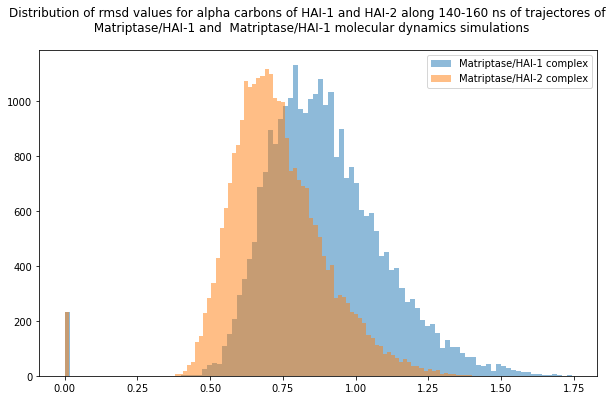

In [13]:
#Calculando si existen diferencias significativas entre la distribución de los datos de rmsd 
#para HAI-1 y HAI-2 en ambas simulaciones
distribution_3= df_HAI_1_rmsd2[2]
distribution_4= df_HAI_2_rmsd2[2]
u_statistic, p_value = mannwhitneyu(distribution_3, distribution_4)

print(u_statistic)
print("the p-value according to Mann-Whitney U test is ",p_value)
print("There is significative differences in the distribution of",len(distribution_3),"rmsd values between both samples")

plt.figure(figsize=(10,6))
plt.suptitle('Distribution of rmsd values for alpha carbons of HAI-1 and HAI-2 along 140-160 ns of trajectores of \n Matriptase/HAI-1 and  Matriptase/HAI-1 molecular dynamics simulations')

plt.hist(distribution_3, bins=100, alpha=0.5, label='Matriptase/HAI-1 complex')
plt.hist(distribution_4, bins=100, alpha=0.5, label='Matriptase/HAI-2 complex')
plt.legend(loc='upper right')
plt.show()